<img src="https://miro.medium.com/max/1838/1*hQseRDVLXt2piN_1dfz5pA.jpeg" width="500" height="400">

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [40]:
%matplotlib inline

In [41]:
df = pd.DataFrame({
    'area' : [2600,3000,3200,3600,4000],
    'price' : [550000,565000,610000,720000,725000]
})
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,720000
4,4000,725000


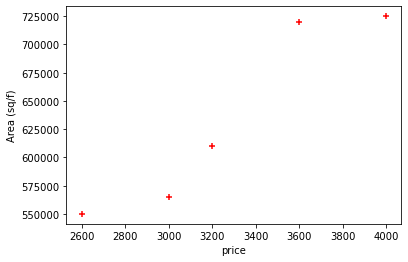

In [42]:
plt.xlabel('price')
plt.ylabel('Area (sq/f)')
plt.scatter(df.area, df.price, color='r', marker='+')  # By this graph we get to know that this is suitable for LINEAR REGRATION

# Linear Regression
when output is in CONTINUOUS format <br> 

In [43]:
reg = linear_model.LinearRegression()       # training model

reg.fit(df[['area']], df.price)

LinearRegression()

In [44]:
reg.score(df[['area']], df.price)           # checking accuracy 

0.8960585327288432

In [45]:
reg.predict([[3300]])         # AREA as input    # using it after training     # syntax changes for diffeent type of input data

array([636934.93150685])

In [46]:
reg.coef_                         # X   # Y = mX + C   

array([146.74657534])

In [47]:
reg.intercept_                    # C   # Y = mX + C

152671.23287671228

In [48]:
# DF to find their prices 
df2 = pd.DataFrame({
    'area' : [2100,3200,3100,3400,2500],
})
df2

,area
0,2100
1,3200
2,3100
3,3400
4,2500


In [49]:
p = reg.predict(df2)           # predicting price

In [50]:
df['Prices'] = p         # creating column & assigning prices in DF
df                       # now we can save it back in new  .csv

,area,price,Prices
0,2600,550000,460839.041096
1,3000,565000,622260.273973
2,3200,610000,607585.616438
3,3600,720000,651609.589041
4,4000,725000,519537.671233


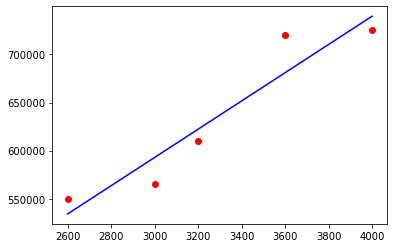

In [51]:
plt.scatter(df.area,df.price, color='r')
plt.plot(df.area,reg.predict(df[['area']]), color='b')

<br>

### using Date for Linear Regration

Linear regression doesn't work on date data. Therefore we need to convert it into numerical value

# Linear Regrassion with Multiple variables  ( Multivariate Regression )

In [52]:
df = pd.DataFrame({
    'area' : [2600,3000,3200,3600,4000],
    'bedroom': [3,4,np.NaN,3,5],
    'age' :  [20,15,18,30,8],
    'price' : [550000,565000,610000,595000,760000]
})
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [53]:
import math

# Data Pre-Processing  /  Data Cleaning     (Hadle missing values)
bed_median = math.floor( df.bedroom.median() )        # median is 3.5 so we convert it to 3
df['bedroom'] = df['bedroom'].fillna(bed_median)
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [54]:
# price = m1*area + m2*bedroom + m3*age + C
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedroom', 'age']], df.price)

LinearRegression()

In [55]:
reg.score(df[['area', 'bedroom', 'age']], df.price)

0.9488817891373804

In [56]:
reg.coef_                   # m1  m2  m3             # price = m1*area + m2*bedroom + m3*age + C

array([   137.25, -26025.  ,  -6825.  ])

In [57]:
reg.intercept_              # C                      # price = m1*area + m2*bedroom + m3*age + C

383724.9999999998

In [58]:
reg.predict([[3000,4,15]])

array([589000.])